In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from main import main
from main_multi import main_multi
from evolution.chromosome import *
from utils.data_manipulators import *
from problems.knapsack_generator import knapsack_generator
%matplotlib notebook

In [2]:
def get_fitness(results):
    fitnesses = np.zeros_like(results)
    for i, rep in enumerate(results):
        for j, gen in enumerate(rep):
            if gen.any() is not None:
                fitnesses[i, j, :] = Chromosome.fitness_to_numpy(gen)
    return fitnesses

def time_concat(time_hist):
    for i in range(1, len(time_hist)):
        time_hist[i] += time_hist[i-1]
    return time_hist

In [3]:
class args:
    tsamples = 10
    src_version = 'v3'
    stop_condition = True
    reps = 0
    transfer = True
    delta = 2
    buildmodel = True
    s1_psize = 50
    s2_psize = 1
    sample_size = 50
    sub_sample_size = 50
    version = 'ea_time_scale'
    mutation_strength = 1
    injection_type = 'full'
    to_repititon_num = 10
    selection_version = 'v1'
    c = np.sqrt(1.5)
    efficient_version = True

In [ ]:
now = time()
results_v1 = main(args)
end = time()  
print("duration: ", str((end - now)/60))

In [4]:
now = time()
results_v1 = main_multi(args)
end = time()  
print("duration: ", str((end - now)/60))

hi
hi
hi
hi
hi
duration:  4.666129219532013


In [5]:
# now = time()
# results_v2_selv1_tor10_efficient = main(args)
# end = time()  
# print("duration: ", str((end - now)/60))

In [6]:
# args.efficient_version = False
# now = time()
# results_v2_selv1_tor10 = main(args)
# end = time()  
# print("duration: ", str((end - now)/60))

In [ ]:
args.version = 'ea_time_scale'
now = time()
results_ea = main(args)
end = time()  
print("duration: ", str((end - now)/60))

In [ ]:
args.version = 'to'
now = time()
results_to = main(args)
end = time()  
print("duration: ", str((end - now)/60))

In [42]:
Tools.save_to_file('data/to_results', results_to)
Tools.save_to_file('data/ea_results', results_ea)

In [5]:
v1_results = results_v1[]

In [10]:
results_v1

In [7]:
results_ea = Tools.load_from_file('data/ea_results')
results_to = Tools.load_from_file('data/to_results')
v1_results = Tools.load_from_file('data/results_v1')
v1_asynch_results = Tools.load_from_file('data/results_v1_async')

In [12]:
# fitness_v2_selv1_tor10 = get_fitness(results_v2_selv1_tor10[0]).mean(axis=0).mean(axis=1)
# fitness_v2_selv1_tor10_efficient = get_fitness(results_v2_selv1_tor10_efficient[0]).mean(axis=0).mean(axis=1)
fitness_v1_async = np.array([result[1] for result in v1_asynch_results]).mean(axis=0).mean(axis=1)
fitness_v1 = np.array([result[1] for result in v1_results]).mean(axis=0).mean(axis=1)
fitness_ea = results_ea[0].mean(axis=0).mean(axis=1)
fitness_to = results_to[0].mean(axis=0).mean(axis=1)

In [13]:
# time_v2_selv1_tor10 = time_concat(results_v2_selv1_tor10[3].mean(axis=0).mean(axis=1))
# time_v2_selv1_tor10_efficient = time_concat(results_v2_selv1_tor10_efficient[3].mean(axis=0).mean(axis=1))
time_v1_async = time_concat(np.array([result[0] for result in v1_asynch_results]).mean(axis=0))
time_v1 = time_concat(np.array([result[0] for result in v1_results]).mean(axis=0))
time_ea = time_concat(results_ea[1].mean(axis=0))
time_to = time_concat(results_to[2].mean(axis=0))

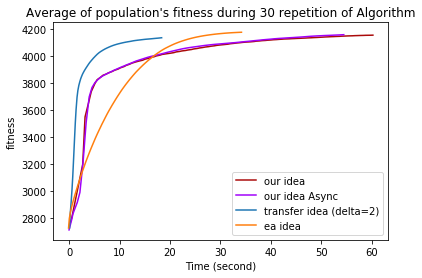

In [18]:
plt.plot(time_v1, fitness_v1, '#aa0a0a', label='our idea')
plt.plot(time_v1_async, fitness_v1_async, '#a000fa', label='our idea Async')
# plt.plot(time_v2_selv1_tor10, fitness_v2_selv1_tor10, '#bcabcc', label='our idea not efficient 10 pop_s2')
plt.plot(time_to, fitness_to,label='transfer idea (delta=2)')
plt.plot(time_ea, fitness_ea,label='ea idea')
plt.legend()
plt.xlabel('Time (second)')
plt.ylabel('fitness')
plt.title("Average of population's fitness during 30 repetition of Algorithm")
plt.show()

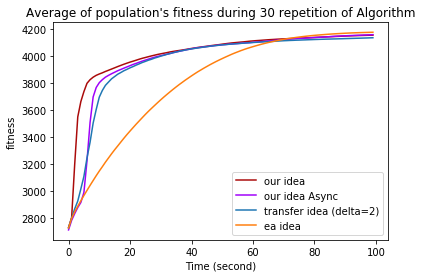

In [17]:
plt.plot(range(100), fitness_v1, '#aa0a0a', label='our idea')
plt.plot(range(100), fitness_v1_async, '#a000fa', label='our idea Async')
# plt.plot(time_v2_selv1_tor10, fitness_v2_selv1_tor10, '#bcabcc', label='our idea not efficient 10 pop_s2')
plt.plot(range(100), fitness_to,label='transfer idea (delta=2)')
plt.plot(range(100), fitness_ea,label='ea idea')
plt.legend()
plt.xlabel('Time (second)')
plt.ylabel('fitness')
plt.title("Average of population's fitness during 30 repetition of Algorithm")
plt.show()

In [ ]:
s